### import modules

In [ ]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


### load models

In [2]:
face_detection=cv.CascadeClassifier(r"model/Haar-Cascade.xml")
emotion_detection=load_model("model/My_model.h5")
labels=["Angry","Disgust","Fear","Happy","Neutral","Sad","Surprise"]

### For image

In [ ]:
img=cv.imread(r'model/SIR_8026.JPG')

img_gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
Face_dim=face_detection.detectMultiScale(img_gray, scaleFactor=1.33, minNeighbors=4)
for (x,y,w,h) in Face_dim:
    cv.rectangle(img,(x,y),(x+w,h+y),(0,255,0),4)
    face=img_gray[y:y+h , x:x+w]
    face = cv.resize(face,(48,48),interpolation=cv.INTER_AREA)
    face = np.expand_dims(face,axis=0)
    #face=np.expand_dims(np.expand_dims(cv.resize(face,(48,48)),-1),0)
    emotion=emotion_detection.predict(face)
    index=np.argmax(emotion)
    cv.putText(img,str(labels[index]),(x+5,y-20),cv.FONT_HERSHEY_PLAIN,7,(0,255,0),10)
cv.imshow('img',img)
cv.waitKey(0)

#### this is screen shot from colab becuse i can't run code in my local machine

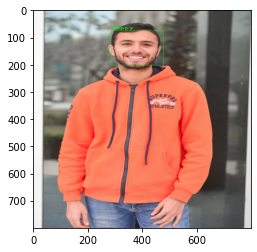

In [3]:
i=cv.imread('Test.png')
i=cv.cvtColor(i,cv.COLOR_BGR2RGB)

plt.imshow(i)

### For video

In [ ]:
capture = cv.VideoCapture(0)
while True:
    isTrue, img = capture.read()
    if isTrue:    
        img=cv.flip(img,1)
        img_gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
        Face_dim=face_detection.detectMultiScale(img_gray, scaleFactor=1.33, minNeighbors=4)
        for (x,y,w,h) in Face_dim:
            cv.rectangle(img,(x,y),(x+w,h+y),(0,255,0),4)
            face=img_gray[y:y+h , x:x+w]
            face = cv.resize(face,(48,48),interpolation=cv.INTER_AREA)
            face = np.expand_dims(face,axis=0)
            #face=np.expand_dims(np.expand_dims(cv.resize(face,(48,48)),-1),0)
            emotion=emotion_detection.predict(face)
            index=np.argmax(emotion)
            cv.putText(img,str(labels[index]),(x+5,y-20),cv.FONT_HERSHEY_PLAIN,7,(0,255,0),10)
        cv.imshow(img)
        if cv.waitKey(20) & 0xFF==ord('x'):
            break   
    else:
        break

capture.release()
cv.destroyAllWindows()